In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option("display.max_colwidth", 200)

In [15]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Data mul factor", col_order=["No mixup", "5x", "10x"],
                    data=score_df, ci="sd", kind="bar", hue_order=[0, 0.01, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 2.0, 5.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-0.2, 0.2))
    if metric == "R2" and score_type == "In-sample":
        g.set(ylim=(-0.05, 1.0))
        
    plt.show()
    # plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", hue_order=None):   

    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():
            
            for model in score_df["Model"].unique():

                filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                         & (score_df["Model"] == model)]

                title = title_prefix + metric + " - " + score_type + " - " + model

                plot_scores(filtered_data, metric, score_type, title, save_folder, hue_order=hue_order)

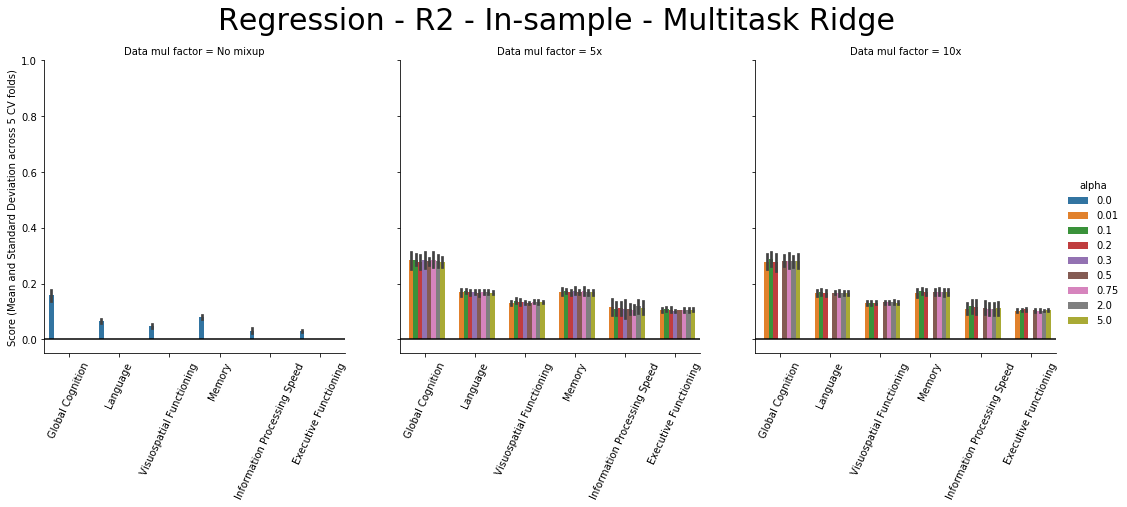

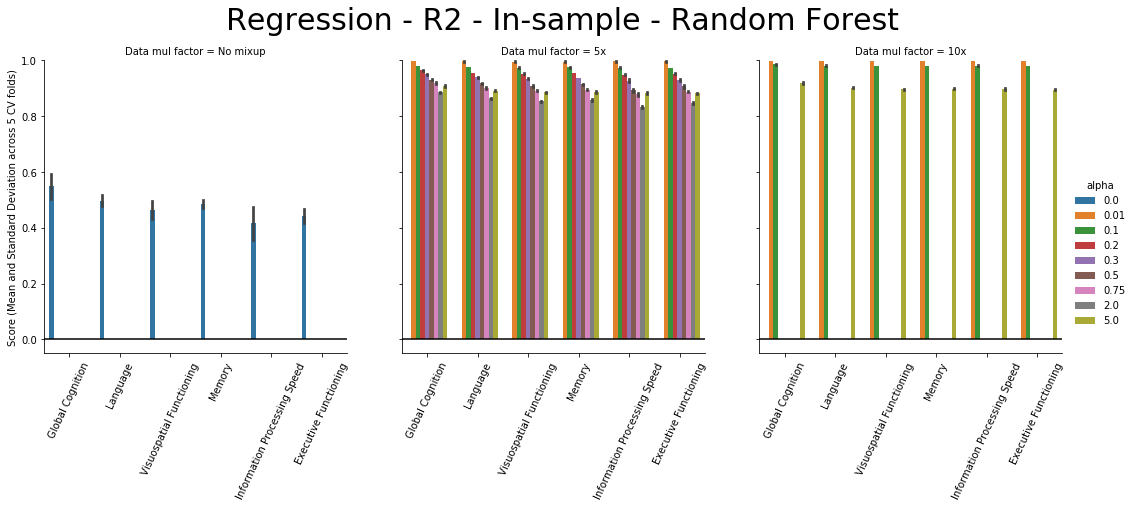

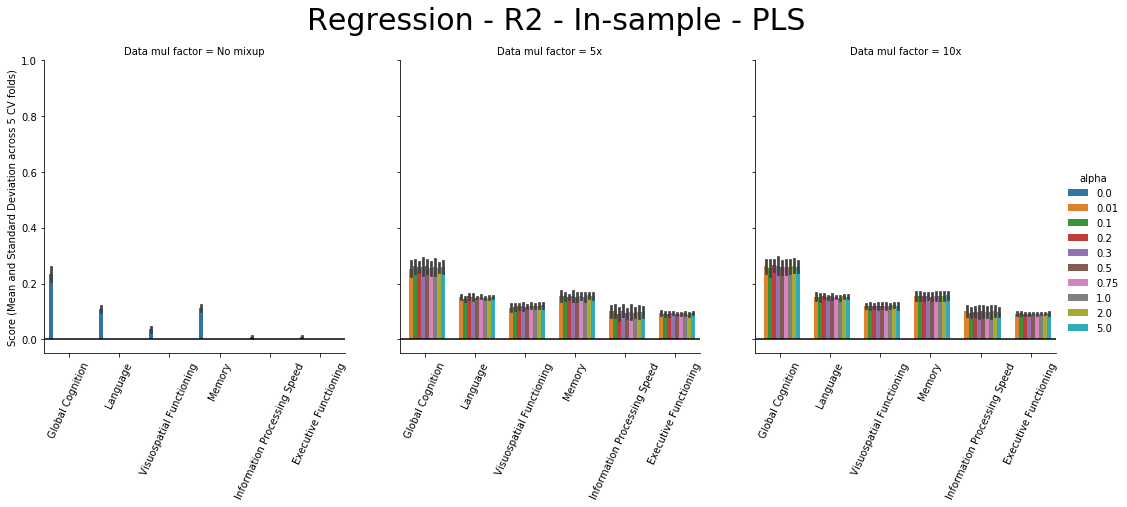

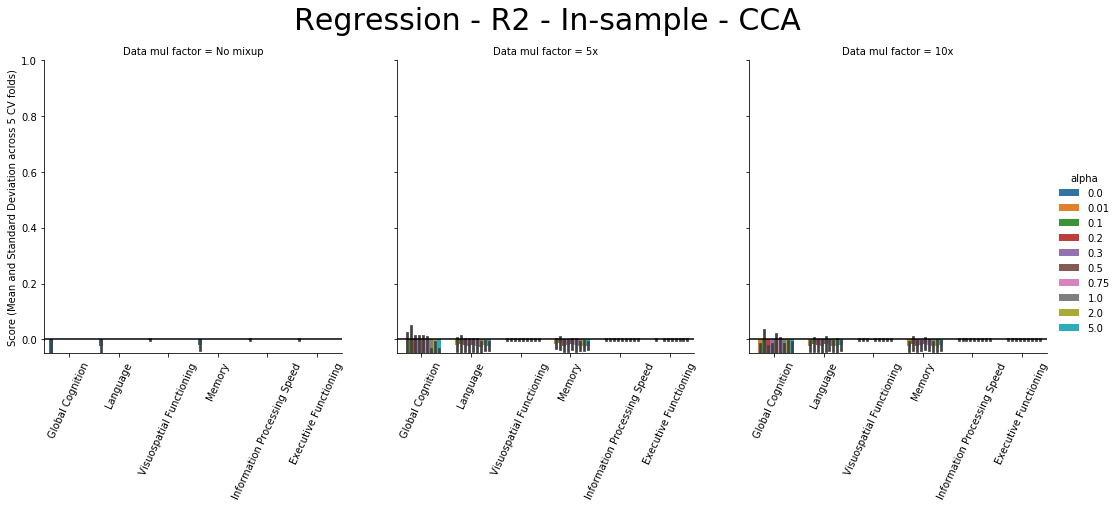

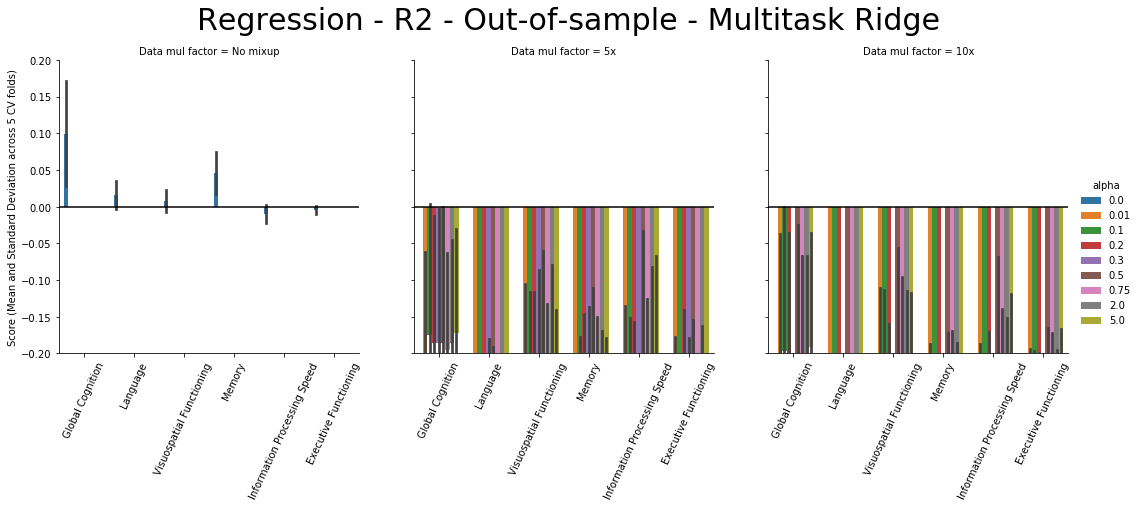

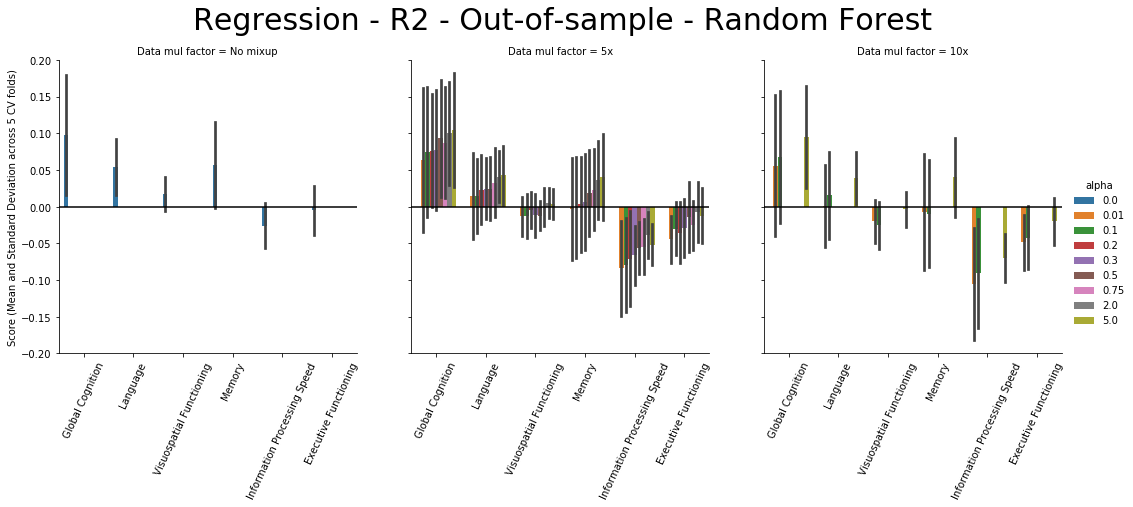

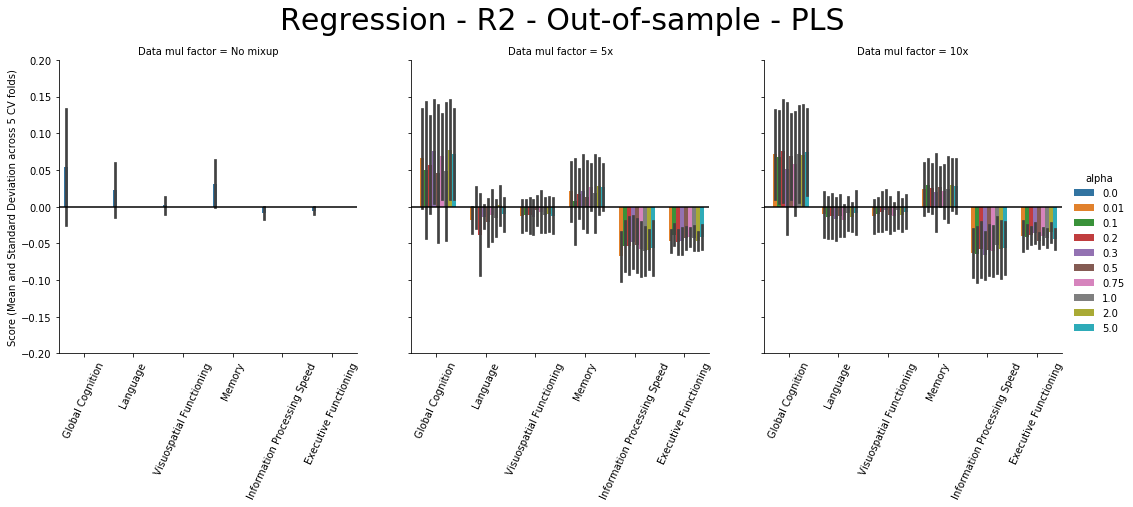

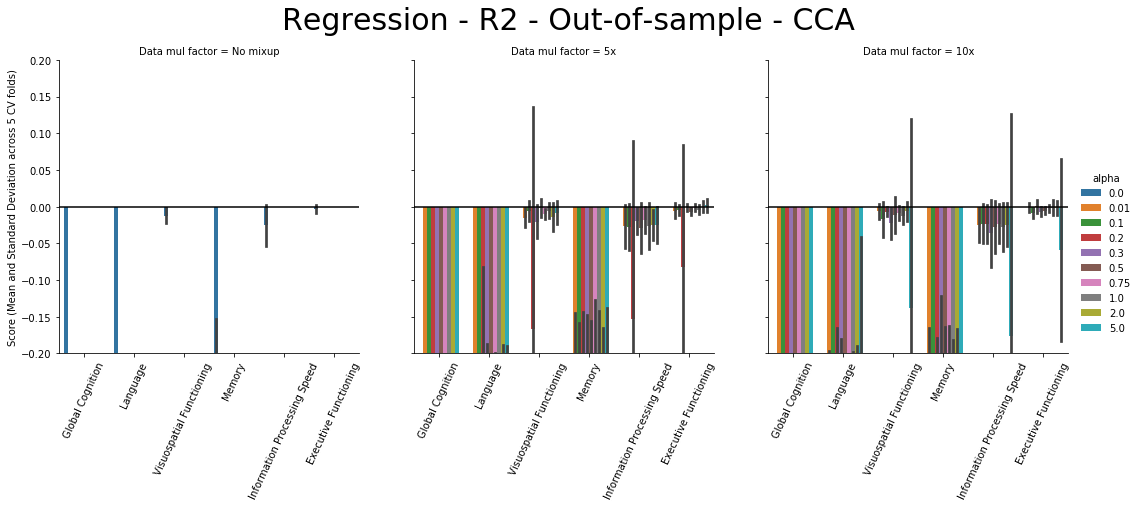

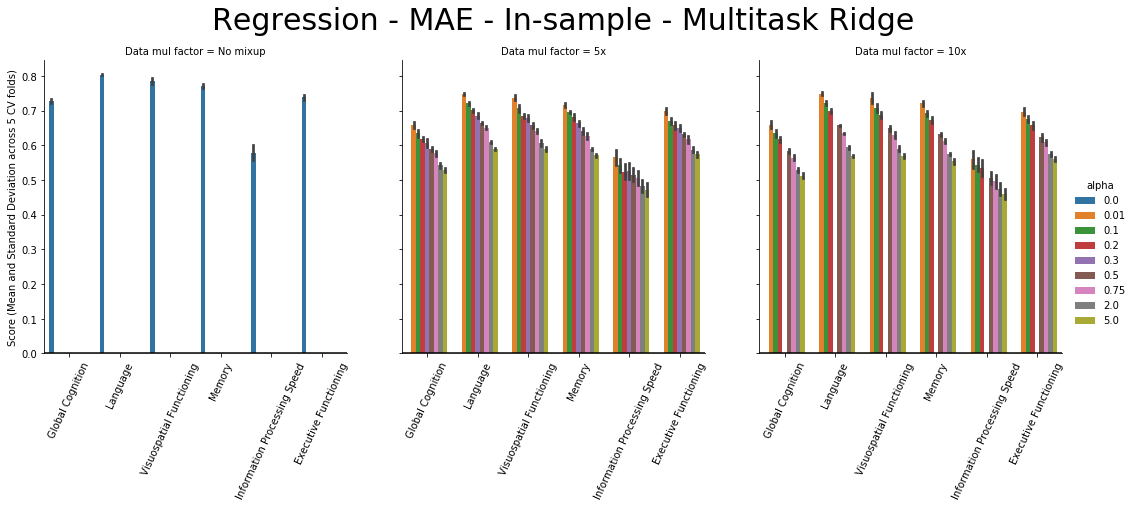

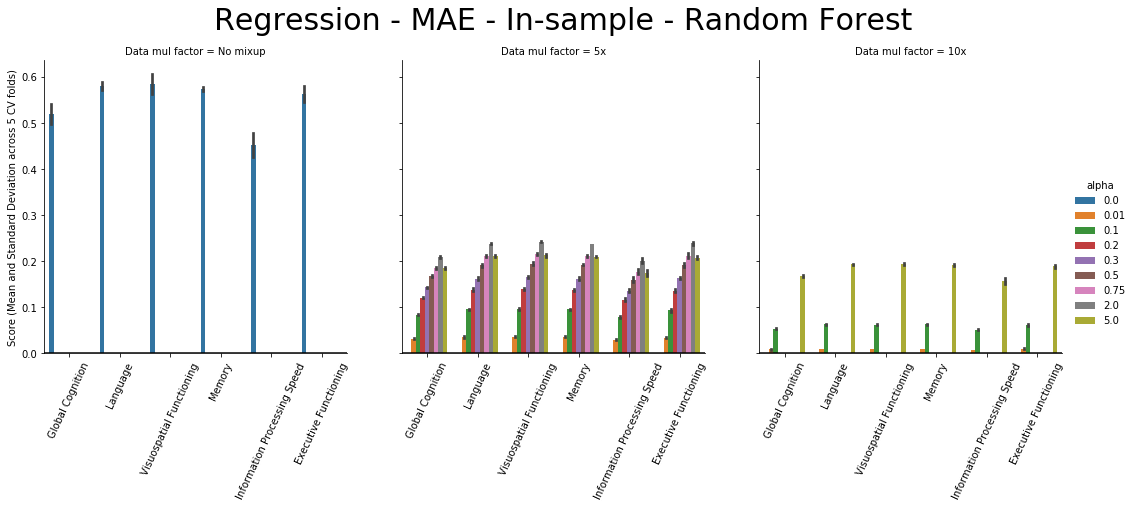

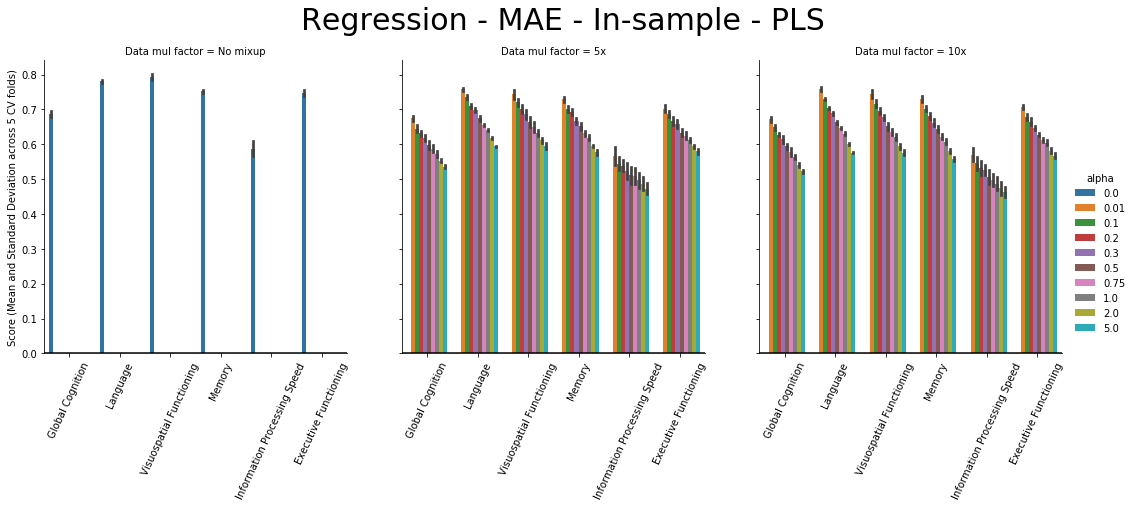

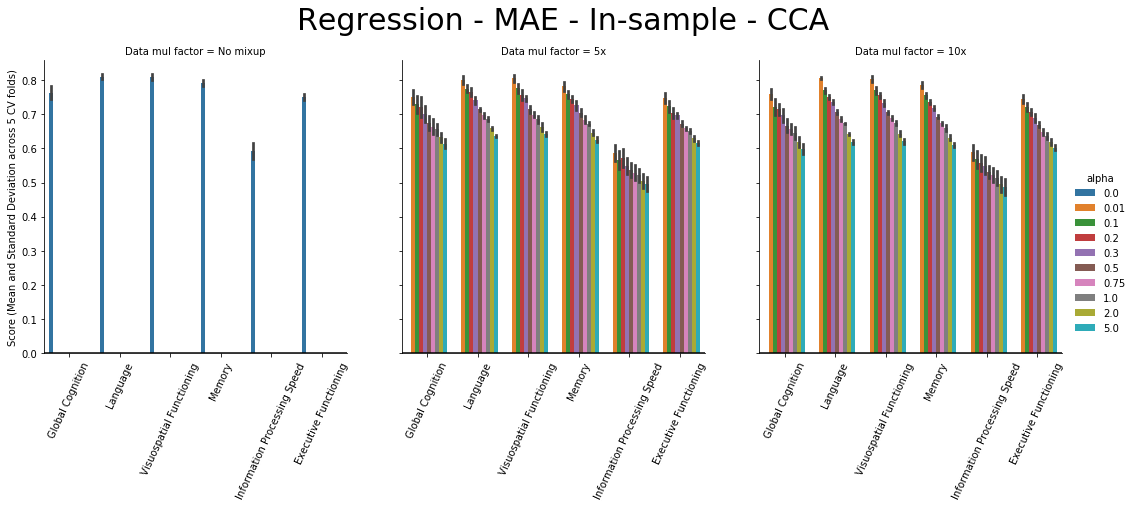

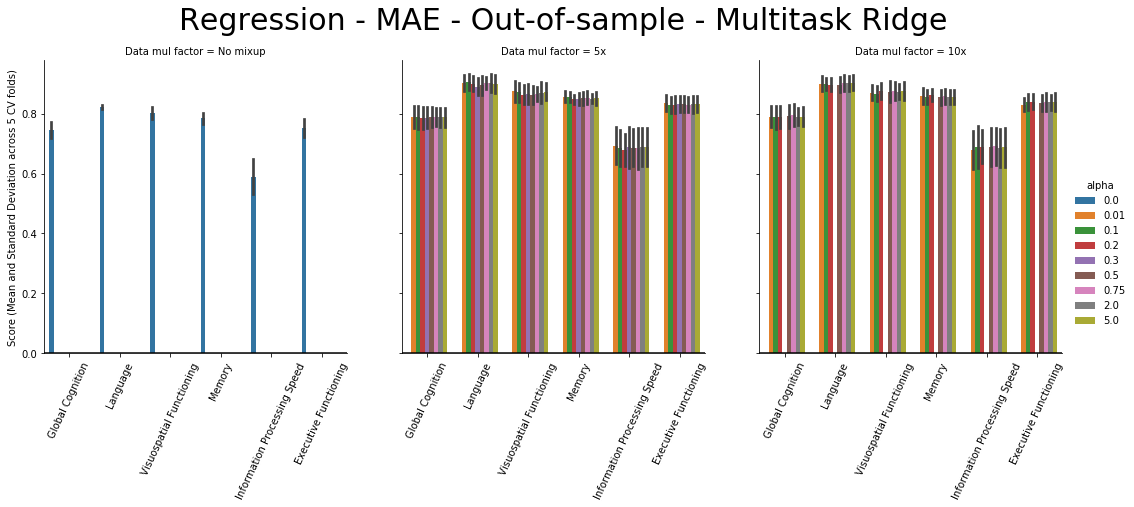

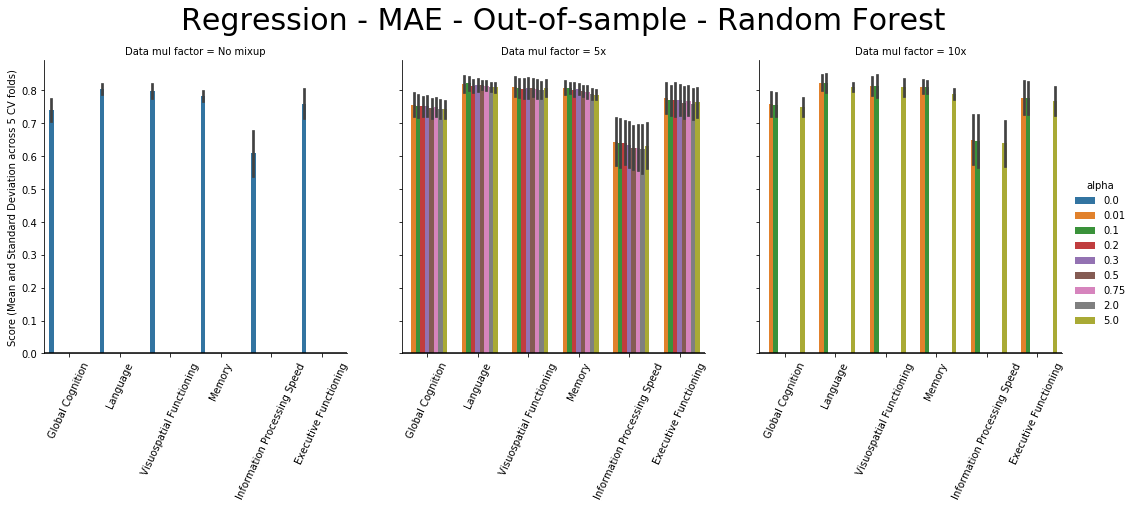

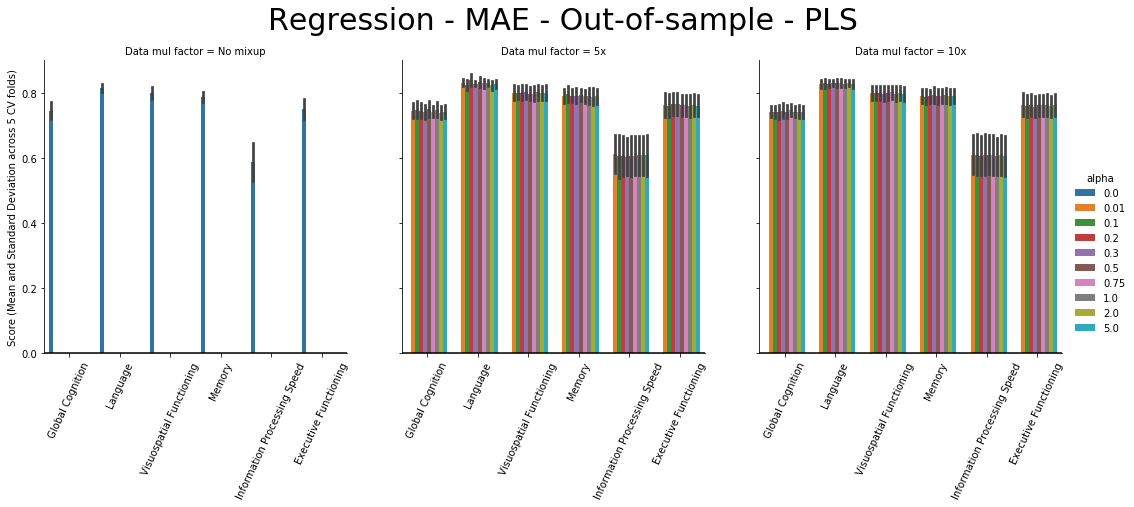

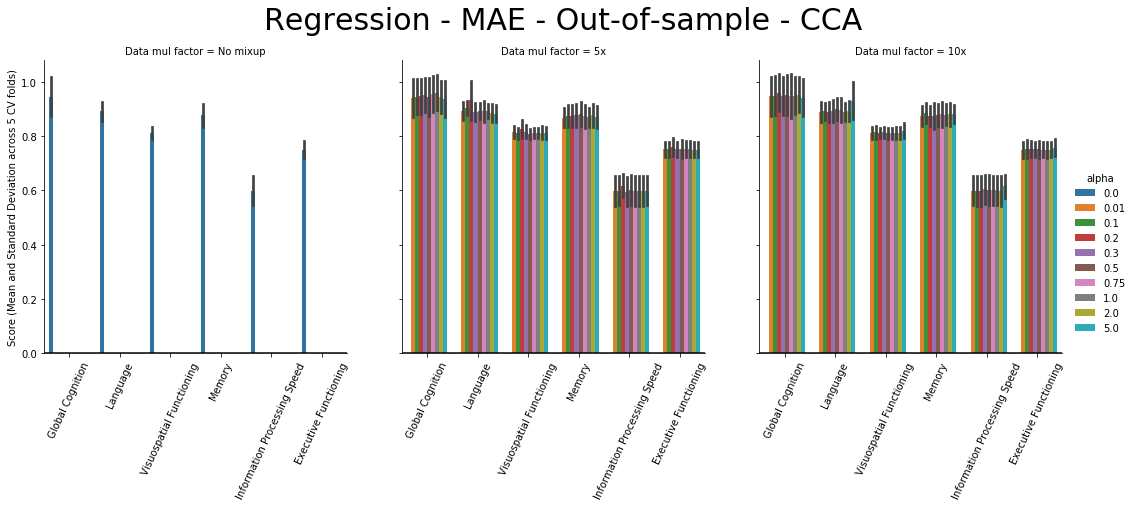

In [18]:
# scores_all = pd.read_hdf('results/results_pca_100_multioutput_mixup_all.h5', key='p', mode='r')
# scores_all["alpha"] = scores_all["alpha"].replace(np.NaN, 0)
plot_all_scores(scores_all, title_prefix="Regression - ")